In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
train_df =pd.read_csv('/content/train.csv')
test_df =pd.read_csv('/content/test.csv')
combine =[train_df, test_df]
frame = pd.DataFrame(data=train_df)
frame2 = pd.DataFrame(data=test_df)
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [ ]:
#### 1 ###
frame['Gender'] = 0
frame2['Gender'] = 0
for i in range(len(frame['Sex'])):
  if(frame['Sex'][i] == 'female'):
    frame.at[i,'Gender'] = 1
for i in range(len(frame2['Sex'])):
  if(frame2['Sex'][i] == 'female'):
    frame2.at[i,'Gender'] = 1  

import random
find = frame['Age'].isnull()
for i in range(len(frame['Age'])):
  if(find[i] == True):
    frame.at[i,'Age'] = random.randint(0,81)
find = frame2['Age'].isnull()
for i in range(len(frame2['Age'])):
  if(find[i] == True):
    frame2.at[i,'Age'] = random.randint(0,81)

find = frame['Embarked'].isnull()
for i in range(len(frame['Embarked'])):
  if(find[i] == True):
    frame.at[i,'Embarked'] = 'S'
find = frame2['Embarked'].isnull()
for i in range(len(frame2['Embarked'])):
  if(find[i] == True):
    frame2.at[i,'Embarked'] = 'S'

mod = frame['Fare'].mode()
for i in range(len(frame['Fare'])):
  if(frame['Fare'][i] == 0):
    frame.at[i,'Fare'] = mod
mod = frame2['Fare'].mode()
for i in range(len(frame2['Fare'])):
  if(frame2['Fare'][i] == 0):
    frame2.at[i,'Fare'] = mod

frame['AgeBand'] = 0
frame2['AgeBand'] = 0
for i in range(len(frame['Age'])):
  if(frame['Age'][i] > 20.125 and frame['Age'][i] <= 28):
    frame.at[i,'AgeBand'] = 1
  if(frame['Age'][i] > 28 and frame['Fare'][i] <= 38.0):
    frame.at[i,'AgeBand'] = 2
  if(frame['Age'][i] >38.0):
    frame.at[i,'AgeBand'] = 3
for i in range(len(frame2['Fare'])):
  if(frame2['Age'][i] >20.125 and frame2['Age'][i] <= 28):
    frame2.at[i,'AgeBand'] = 1
  if(frame2['Age'][i] >28 and frame2['Age'][i] <= 38.0):
    frame2.at[i,'AgeBand'] = 2
  if(frame2['Age'][i] >38.0):
    frame2.at[i,'AgeBand'] = 3 

In [ ]:
train_df.corr(method ='pearson') 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,AgeBand
PassengerId,1.000000,-0.005007,-0.035144,-0.021966,-0.057527,-0.001652,0.013426,-0.042939,-0.004303
Survived,-0.005007,1.000000,-0.338481,-0.079951,-0.035322,0.081629,0.255924,0.543351,-0.104586
Pclass,-0.035144,-0.338481,1.000000,-0.189813,0.083081,0.018443,-0.551582,-0.131900,-0.109229
Age,-0.021966,-0.079951,-0.189813,1.000000,-0.163681,-0.170716,0.035598,-0.090658,0.855400
SibSp,-0.057527,-0.035322,0.083081,-0.163681,1.000000,0.414838,0.158602,0.114631,-0.147906
Parch,-0.001652,0.081629,0.018443,-0.170716,0.414838,1.000000,0.215267,0.245489,-0.105003
Fare,0.013426,0.255924,-0.551582,0.035598,0.158602,0.215267,1.000000,0.180600,-0.087063
Gender,-0.042939,0.543351,-0.131900,-0.090658,0.114631,0.245489,0.180600,1.000000,-0.096102
AgeBand,-0.004303,-0.104586,-0.109229,0.855400,-0.147906,-0.105003,-0.087063,-0.096102,1.000000


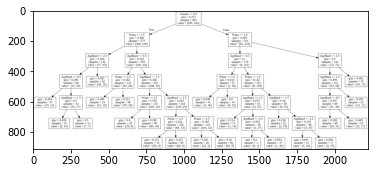

In [ ]:
### 3 ###
features=['Pclass','Gender','AgeBand']
x = train_df[features]
y = train_df['Survived']
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
### 4 ###
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtree,x,y,cv=5))

[0.75977654 0.79213483 0.7752809  0.7752809  0.78651685]


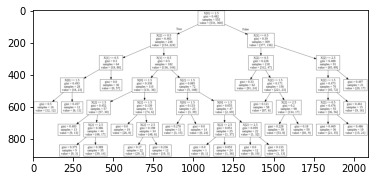

In [ ]:
### 5 ###
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x,y)
tree_count = 0
for tree_in_random_forest in clf.estimators_:
    if (tree_count ==1):        
        rfr_file = tree.export_graphviz(tree_in_random_forest, out_file=None)
        rfr_graph = pydotplus.graph_from_dot_data(rfr_file)        
    tree_count = tree_count + 1
rfr_graph.write_png('myrandomtree.png')

img=pltimg.imread('myrandomtree.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
### 5 ###
print(cross_val_score(clf,x,y,cv=5))

[0.75977654 0.79213483 0.78651685 0.7752809  0.78651685]
